<a href="https://colab.research.google.com/github/DrueStaples/Fuel_Efficient_Predictor/blob/master/Predict_MPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Congratuations ML/DL Enthusiast! Your favorite autonomous car company has offered you a positon to join their DL team!  The first assignment for your team is to focus on fuel efficiency for their many future models.  

#First day of the project, you find a dataset online with many vehicles and their features (including MPG); you and your team decide to use the features to predict the miles per gallon. This way certain features can receive more attention if need be. Let's get started! 

(The real dataset is from UCI, managed by CMU, and contains 398 cars from the 1970's-1980's)




---



#Step 1.) Import the packages!

In [0]:
#helps find our packages correctly when we import them
from __future__ import absolute_import, division, print_function

import pathlib #object oriented interface 

import pandas as pd #data structures
import seaborn as sns #cool visuals for our graphs

import tensorflow as tf #dataflow
from tensorflow import keras #model
from tensorflow.keras import layers #model's layers

print(tf.__version__)

1.13.1


#Step 2.) Load the dataset! 

In [0]:
load_dataset = keras.utils.get_file('auto-mpg.data', 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')
load_dataset

'/root/.keras/datasets/auto-mpg.data'

#Step 3.) Explore the data by putting it in a pandas frame!

In [0]:
#names of each of our columns
column_names= ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']


#reads a csv file into a dataframe
#what file to grab,  names of our columns,  what to call missing values,  how to handle commented values,  how to deliminate the values,  strip white space 
frame = pd.read_csv(load_dataset, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)


#make a copy to view the last(tail) or first(head) n rows  
frame_copy = frame.copy()
#frame_copy.head(n=10)
frame_copy.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


#Step 4.) Preprocess (Clean) the data

In [0]:
#Does the dataset contain missing values?

frame_copy.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

Let's drop the Horsepower category from our dataframe since there are 6 missing values

In [0]:
dataset= frame_copy.dropna()

The 'Origin' column equals 1,2, or 3 pertaining to locations (USA, EURO, JAP), therefore
convert the  'Origin' column to a one-hot column

In [0]:
#turn the single 'Origin' column w/three options into 
#three columns with binary options

location = dataset.pop('Origin')

dataset['USA'] = (location == 1)*1.0
dataset['EURO'] = (location == 2)*1.0
dataset['JAP'] = (location == 3)*1.0

dataset.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,EURO,JAP
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


#Step 5.) Split the data into a training and test set. 

In [0]:
training = dataset.sample(frac=0.8,random_state=0)

testing = dataset.drop(training.index)

Just to see some of the joint distributions, inspect the data through the cool seaborn visuals  amongst some of the features like the four below! 

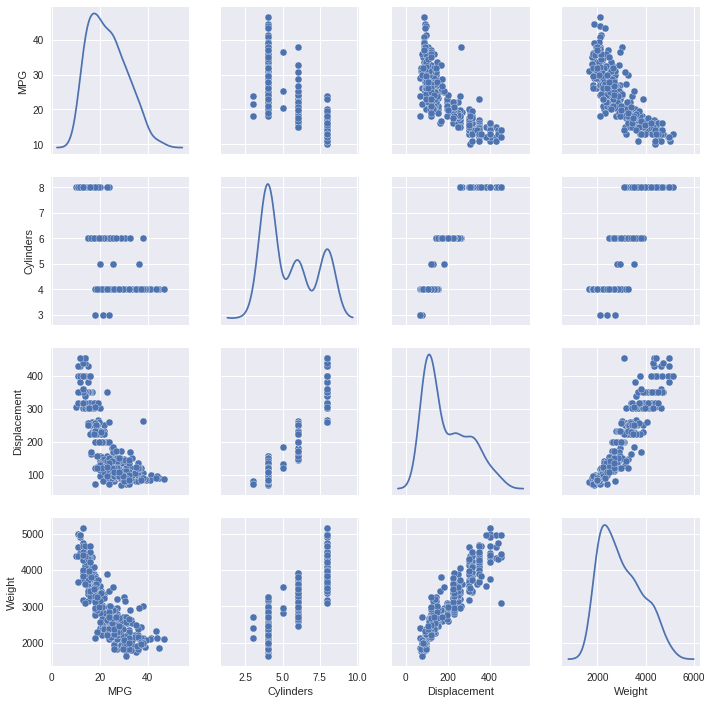

In [0]:
#pairplot plots pairwise relationships within dataset
#kde--kernal density estimation plots, smooth versions of histograms
sns.pairplot(training[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [0]:
#look at the stats!

training_stats = training.describe()
training_stats.pop('MPG')
training_stats = training_stats.transpose()
training_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
EURO,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
JAP,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


Split the feature 'MPG' from both our training and test set becuse that's what we're trying to predict.

In [0]:
train_mpg = training.pop('MPG')

test_mpg = testing.pop('MPG')

Normalize the data so the values of our features aren't sporadic

In [0]:
#standard deviation is the range from the mean. 
#a small std means most of the points are close to the average
#a large std means most of the points are spread out from the average

#x - mean / std
def normalize(x):
  return (x - training_stats['mean']) / training_stats['std']

normalized_training = normalize(training)
normalized_testing = normalize(testing)

#Step 7.) Build + Compile the Model

In [0]:
#input layer
#hidden layer
#output layer

def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation=tf.nn.relu, input_shape=[len(training.keys())]),
      layers.Dense(64, activation=tf.nn.relu),
      layers.Dense(1)
  ])
  
  optimizer = tf.keras.optimizers.RMSprop(0.001)
  
  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  
  return model

In [0]:
model = build_model() #save our function to a variable

In [0]:
model.summary() #gives us a description of our model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_40 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


#Pre-Training    

Let's predict 13 examples from our training dataset

In [0]:
example_batch = normalized_training[:13]
example_result = model.predict(example_batch)
example_result

array([[0.39723045],
       [0.30126953],
       [0.16749078],
       [0.67023396],
       [0.5085629 ],
       [0.07738984],
       [0.55775833],
       [0.5774284 ],
       [0.06306151],
       [0.389039  ],
       [0.6895039 ],
       [0.08614131],
       [0.2167699 ]], dtype=float32)

#Step 8.) Train the model

In [0]:
#keras callbacks gives us checkpoints for our models
class PrintDot(keras.callbacks.Callback): 
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
    
EPOCHS = 1000

history = model.fit(normalized_training, train_mpg, 
                    epochs=EPOCHS, validation_split = 0.2, 
                    verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

Visualize the Model's training progress (stats) stored in a history object

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,2.236995,0.942140,2.236995,9.008818,2.307518,9.008818,995
996,2.323915,0.959409,2.323915,8.276215,2.206752,8.276216,996
997,2.420223,0.989035,2.420223,8.987393,2.312838,8.987393,997
998,2.249698,0.950165,2.249698,8.344930,2.235377,8.344930,998
999,2.389052,0.970390,2.389052,8.719096,2.269183,8.719096,999


Whoa! Notice the training loss and the cross validation loss INCREASE as we
go through the epochs (instead of decreasing). Let's PLOT THE DATA 
to better see what's going on (for each metric)!

In [0]:
'''
RMSE has the benefit of penalizing large errors more so 
can be more appropriate in some cases, for example, if 
being off by 10 is more than twice as bad as being off 
by 5. But if being off by 10 is just twice as bad as 
being off by 5, then MAE is more appropriate. -JJ(Medium)
'''

'\nRMSE has the benefit of penalizing large errors more so \ncan be more appropriate in some cases, for example, if \nbeing off by 10 is more than twice as bad as being off \nby 5. But if being off by 10 is just twice as bad as \nbeing off by 5, then MAE is more appropriate. -JJ(Medium)\n'

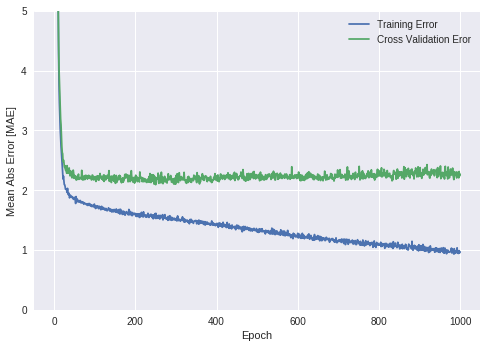

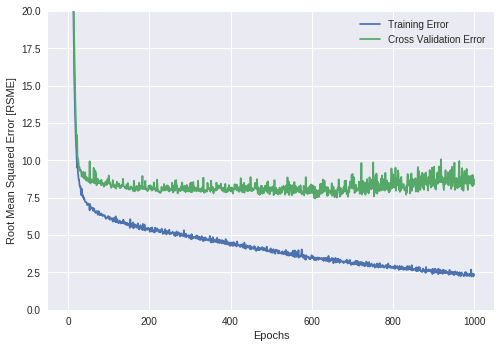

In [0]:
import matplotlib.pyplot as plt #helps with plotting

#create a function to plot the history of 2 figures  
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  #Epochs vs MAE
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MAE]')
  plt.plot(hist['epoch'], 
           hist['mean_absolute_error'], 
           label='Training Error')
  plt.plot(hist['epoch'],
          hist['val_mean_absolute_error'],
          label='Cross Validation Eror')
  plt.ylim([0,5]) #sets limits for y axis
  plt.legend()
  
  
  #Epochs vs RMSE
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Root Mean Squared Error [RSME]')
  plt.plot(hist['epoch'],
          hist['mean_squared_error'],
          label='Training Error')
  plt.plot(hist['epoch'],
          hist['val_mean_squared_error'],
          label='Cross Validation Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()
  
  

plot_history(history)  

In [0]:
model = build_model() #save model_build to variable 'model'

Notice our Cross Validation is not doing as well as our Training Set. This is classic overfitting, so reform the model with EarlyStopping


..............................................................

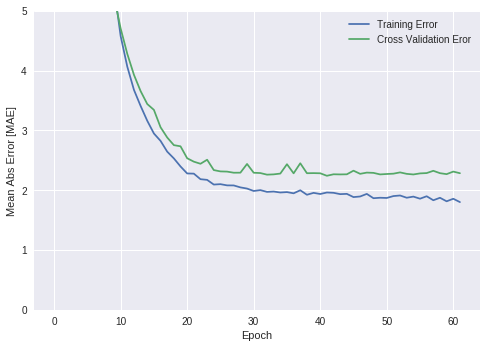

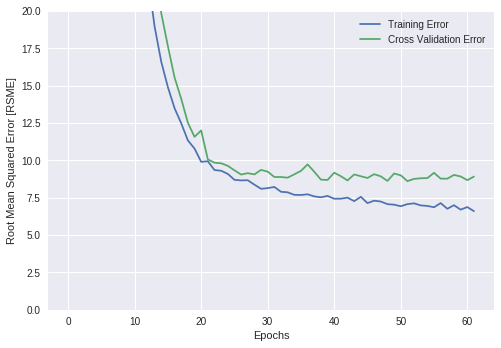

In [0]:
#EarlyStopping--stops training the model once it stops improving
#parameters include what to look for AND the patience parameter

# The patience parameter is the amount of epochs to check through 
#before it stops AFTER it has already stopped improving the first time


early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normalized_training, train_mpg,
                   epochs=EPOCHS, validation_split=0.2, verbose=0,
                   callbacks=[early_stop, PrintDot()])


plot_history(history)


By using EarlyStopping, our cross validation set does a lot better!

Now let's see how well we can expect it to perform on our test set

#9.)Evaluate the model on the test set

In [0]:
#verbose 1-silent, 2-loading_bar, 3-bar/epoch
loss, mae, mse = model.evaluate(normalized_testing, test_mpg, verbose=0)

print('Test Set with Mean Absolute Error: {:5.2f} MPG'.format(mae))

Test Set with Mean Absolute Error:  1.93 MPG


The number ABOVE tells us how well we can expect to predict real world data.

#10.)Make predictions using our test data!

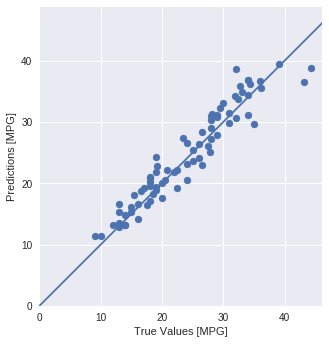

In [0]:
#Make predictions using our testing data!

test_prediction_line = model.predict(normalized_testing).flatten()

plt.scatter(test_mpg, test_prediction_line)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ = plt.plot([-100,100], [-100,100])


Let's look at the error distribution when you compare our prediction line to the true values

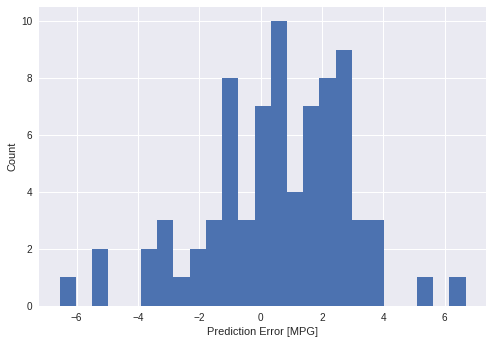

In [0]:
error = test_prediction_line - test_mpg
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count') #setting _ as a variable means to ignore


In [0]:
'''
Gaussians are good for features unrelated to each other and controlling
randomness. If it was gaussian shaped, it would look like a bell curve, 
but because are training set isn't large, it's not suprising to see 
it looking chunky
'''

"\nGaussians are good for features unrelated to each other and controlling\nrandomness. If it was gaussian shaped, it would look like a bell curve, \nbut because are training set isn't large, it's not suprising to see \nit looking chunky\n"